In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os, re
from pandas.tseries.offsets import DateOffset

In [5]:
fnst='trim.slst'
modelcase=["soil","temp","soil_temp"] #,"snow","soil_snow","temp_snow","soil_temp_snow"]

BGU

-0.2467077374347269 -0.2467077374347269
-0.07355651731135579 -0.07355651731135579
   Fitting_results stnm         A         C     tshift      blin      logf  \
0  Fitting_results  BGU -0.151059  0.242431  89.997547  0.000056 -2.111143   

   nsteps  nwlker  
0   12000      32  
90 <class 'str'>
<DateOffset: days=90>
   Fitting_results stnm         A         B         C     tshift      blin  \
0  Fitting_results  BGU -0.151315 -0.000027  0.242823  89.997887  0.000056   

       logf  nsteps  nwlker  
0 -2.112412   12000      32  
90 <class 'str'>
<DateOffset: days=90>
BRPU

-0.1100833244061898 -0.1100833244061898
-0.20958187135750966 -0.20958187135750966
   Fitting_results  stnm         A         C     tshift      blin      logf  \
1  Fitting_results  BRPU -0.108452  0.032227  89.967219  0.000068 -1.622766   

   nsteps  nwlker  
1   12000      32  
90 <class 'str'>
<DateOffset: days=90>
   Fitting_results  stnm         A        B         C     tshift      blin  \
1  Fitting_result

/tmp/ipykernel_1748997/3818191003.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(6, figsize=(8,10))


RDMU

-0.09357389638109029 -0.09357389638109029
0.23424765656133018 0.23424765656133018
    Fitting_results  stnm         A         C     tshift  blin      logf  \
21  Fitting_results  RDMU -0.042858  0.135451  60.860444   0.0 -1.802902   

    nsteps  nwlker  
21   12000      32  
61 <class 'str'>
<DateOffset: days=61>
    Fitting_results  stnm         A         B         C     tshift  blin  \
21  Fitting_results  RDMU -0.042614 -0.000108  0.136912  60.708864   0.0   

        logf  nsteps  nwlker  
21 -1.800371   12000      32  
61 <class 'str'>
<DateOffset: days=61>
SPU

-0.3875588021379223 -0.3875588021379223
0.22749777476991112 0.22749777476991112
    Fitting_results stnm         A         C    tshift      blin      logf  \
22  Fitting_results  SPU -0.093425  0.200036  65.36429  0.000037 -1.693368   

    nsteps  nwlker  
22   12000      32  
65 <class 'str'>
<DateOffset: days=65>
    Fitting_results stnm         A         B         C     tshift      blin  \
22  Fitting_results  S

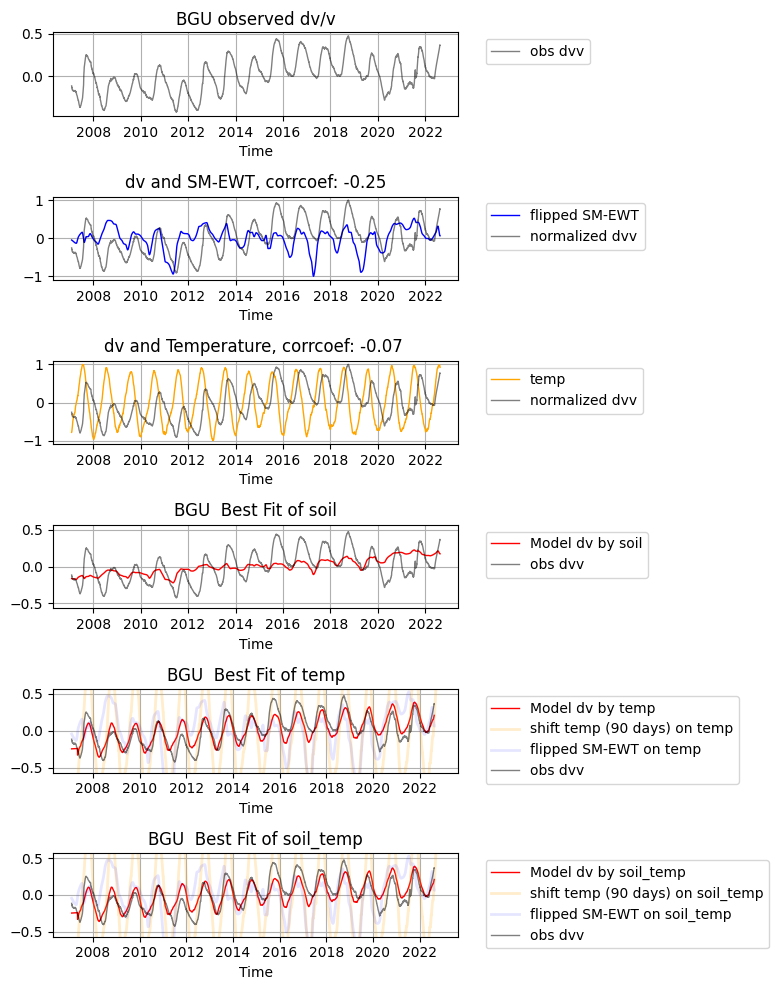

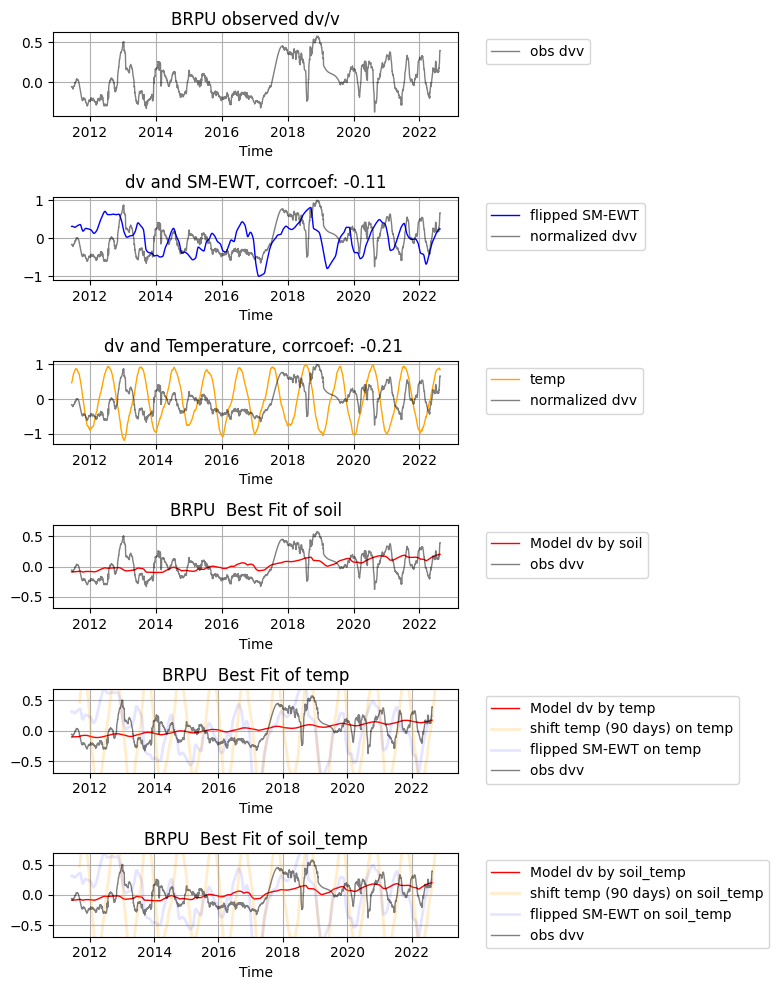

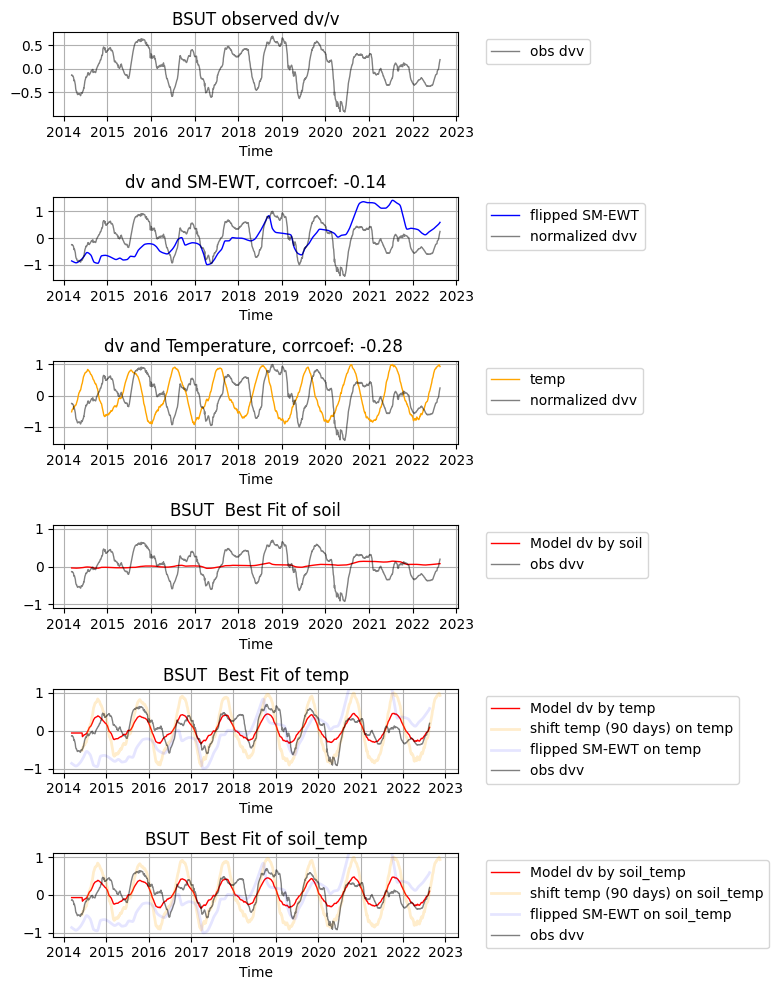

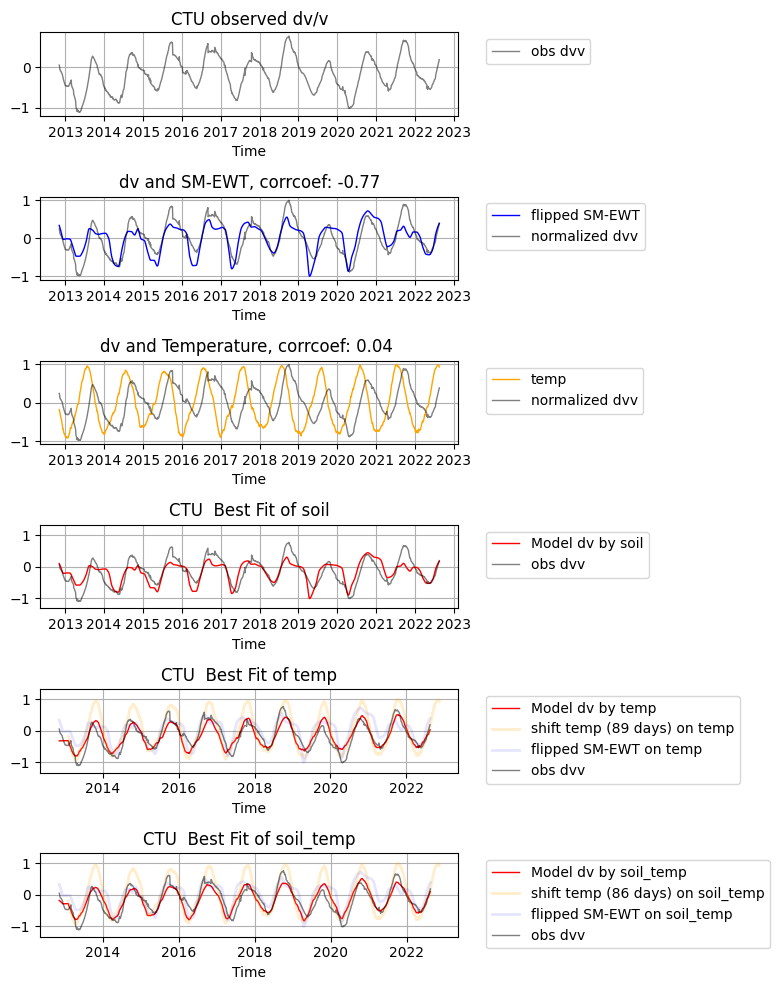

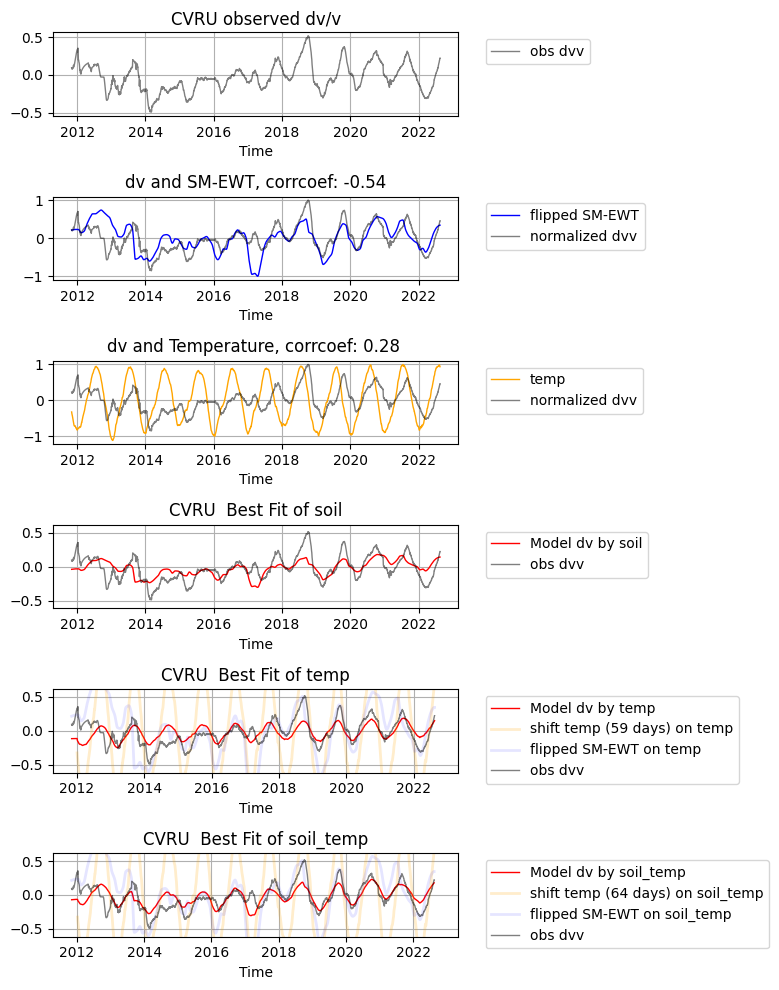

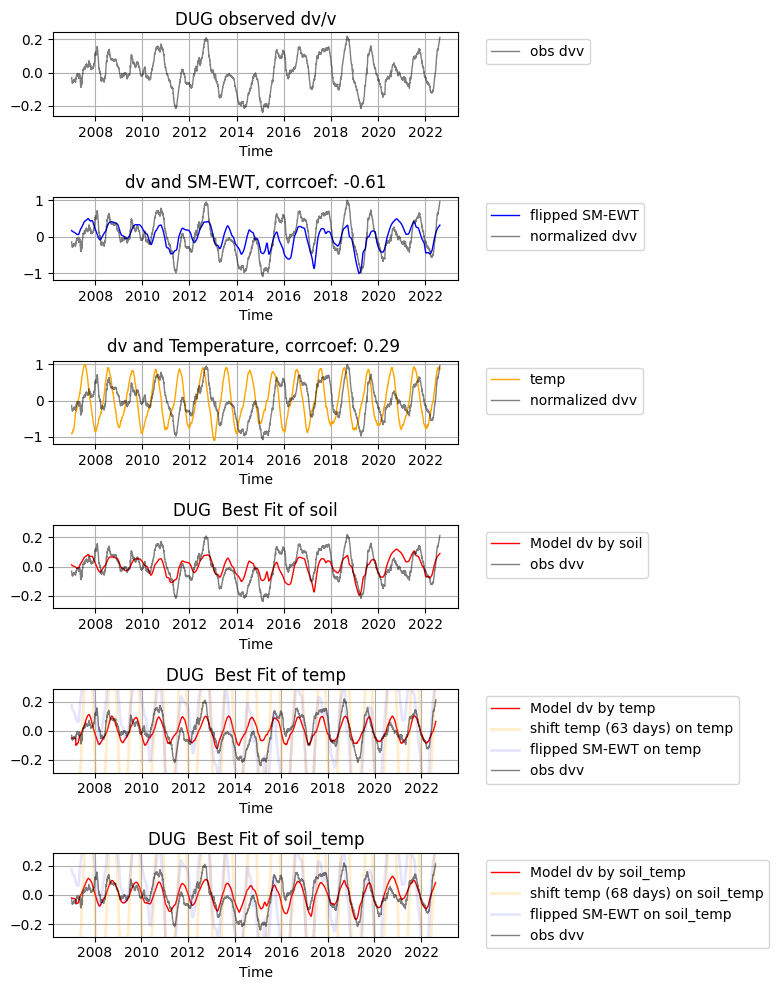

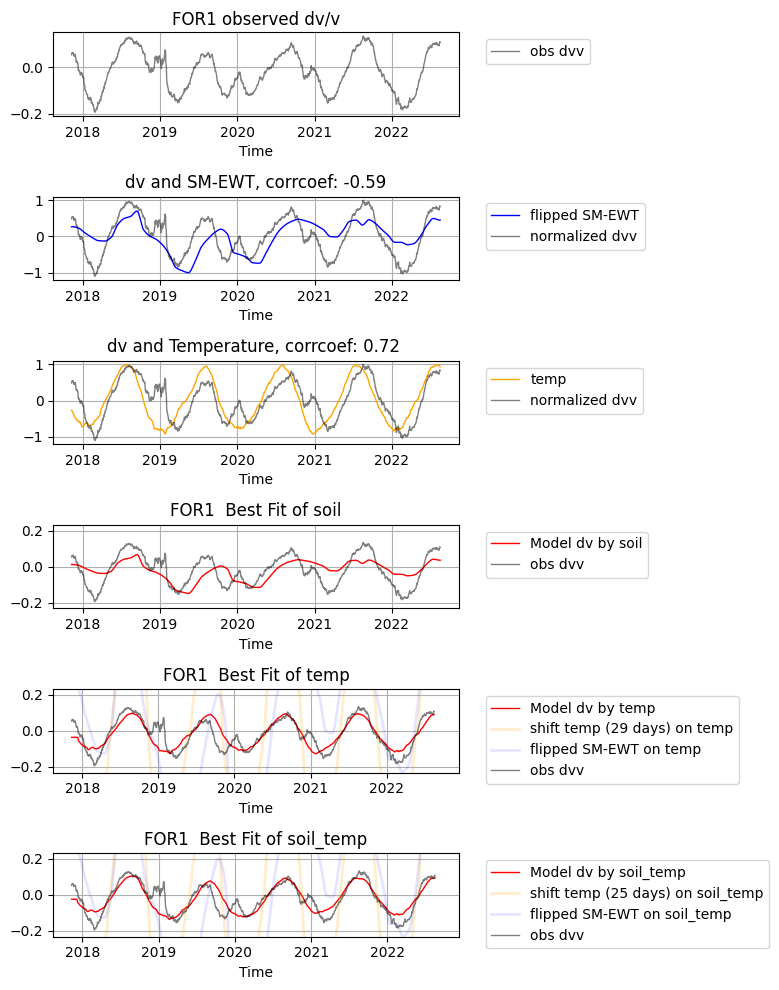

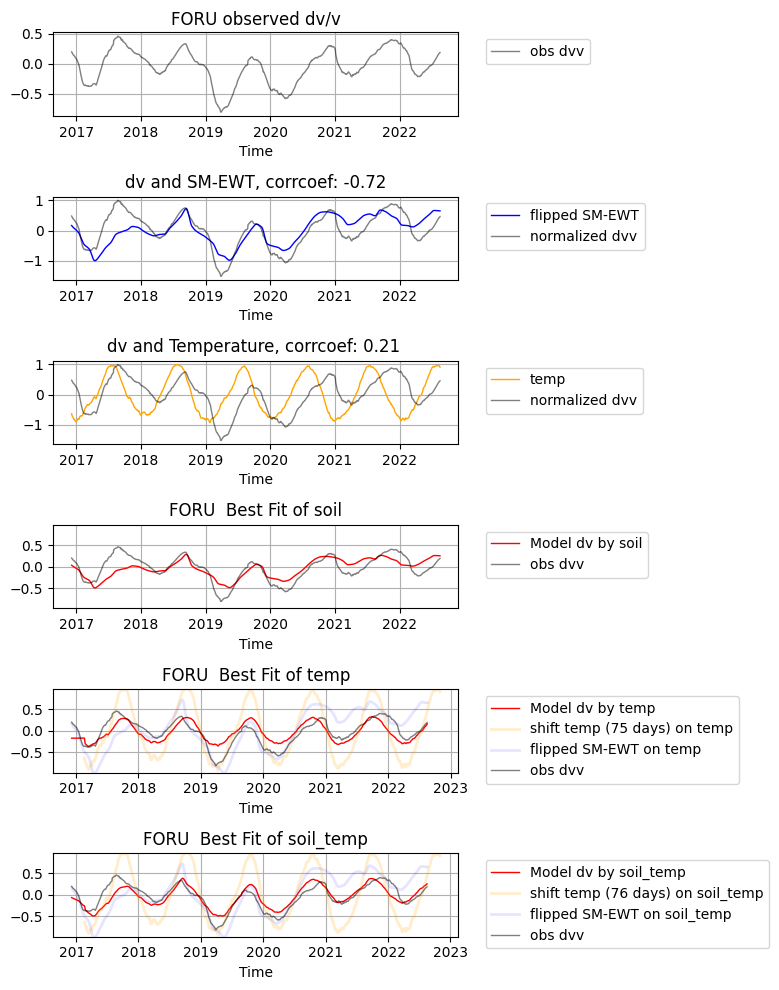

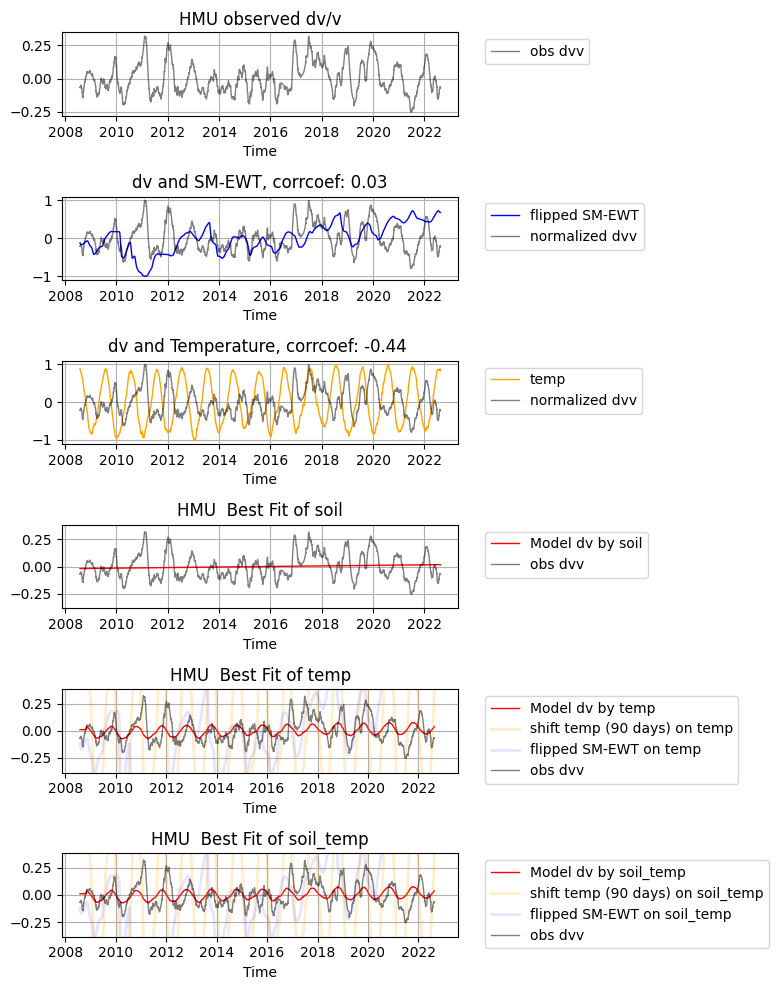

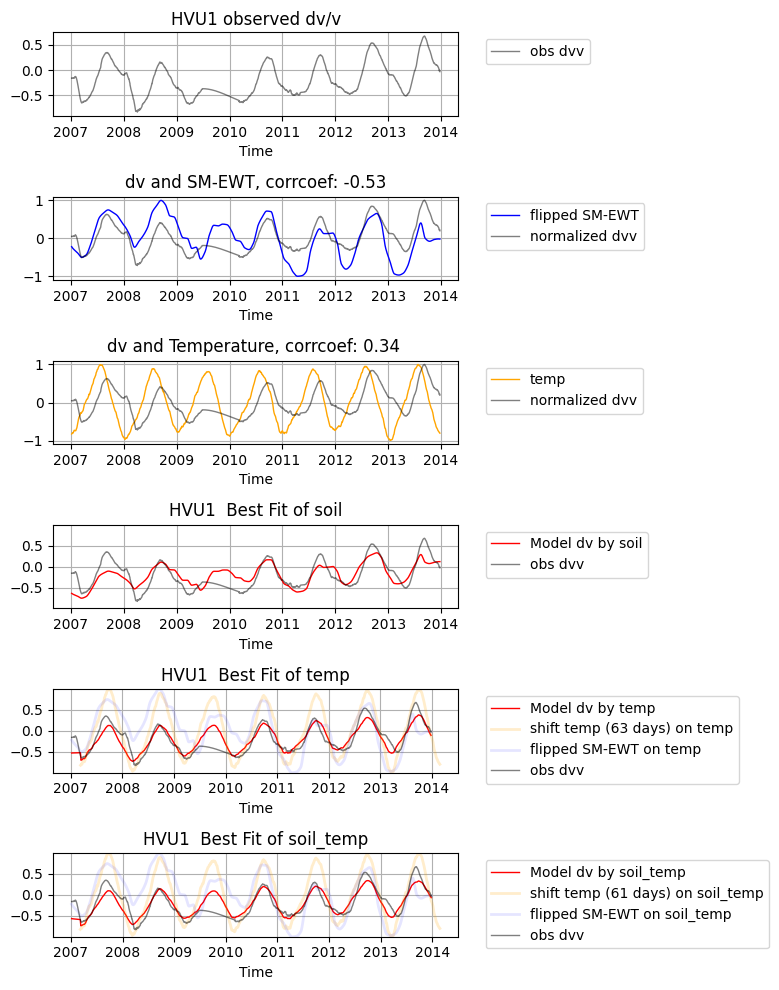

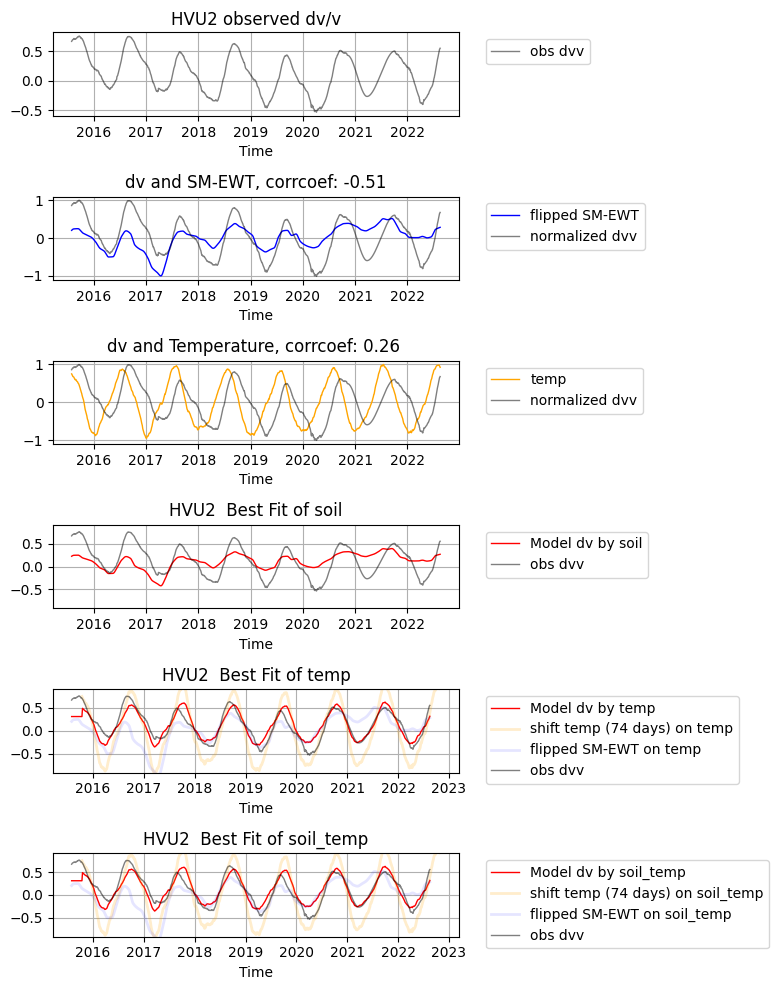

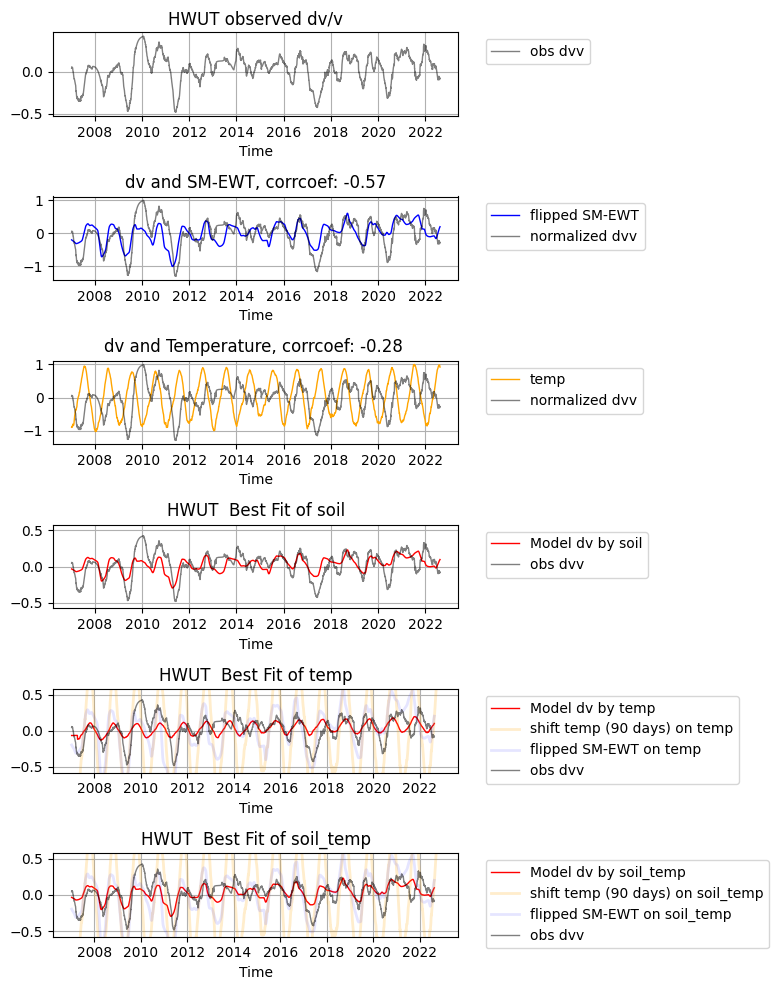

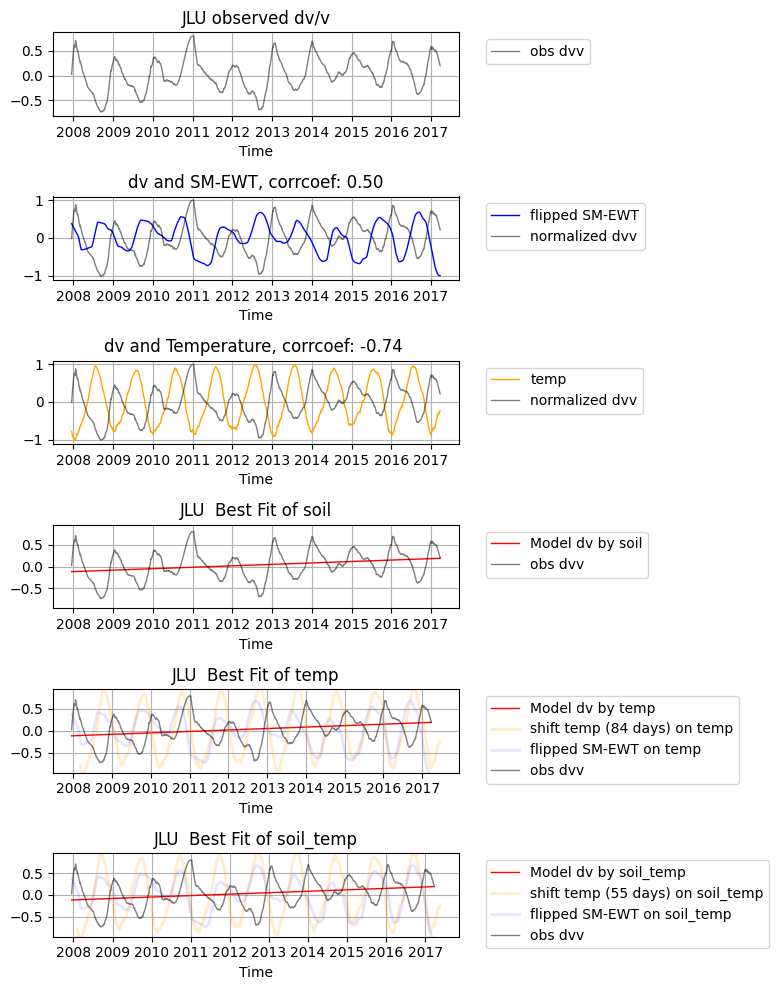

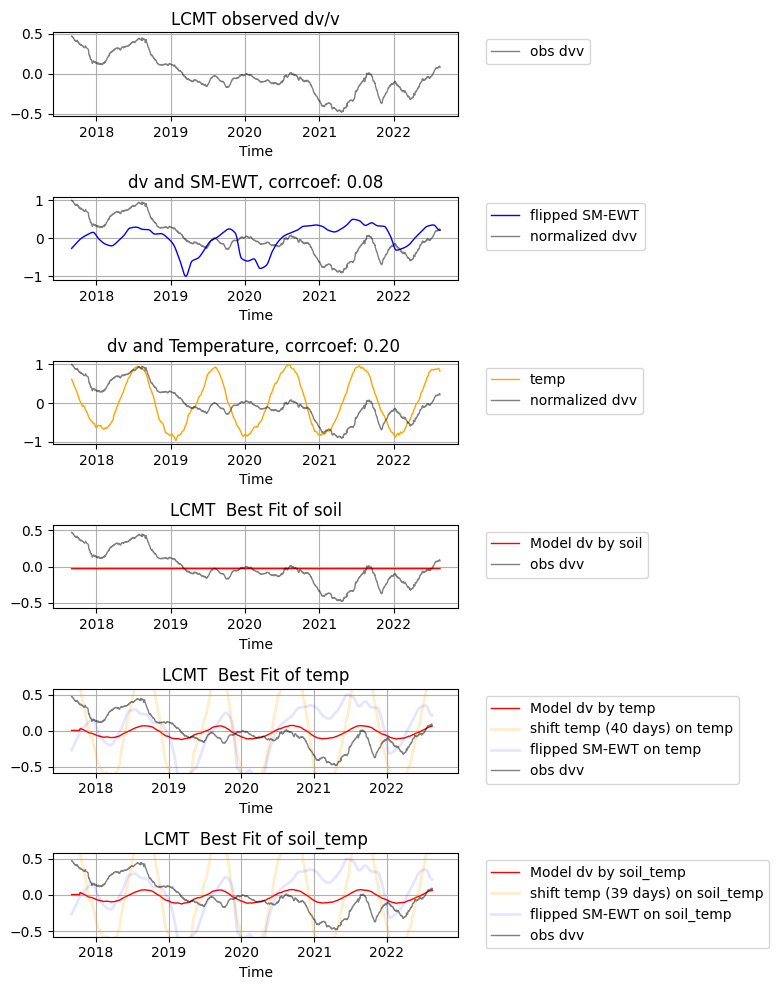

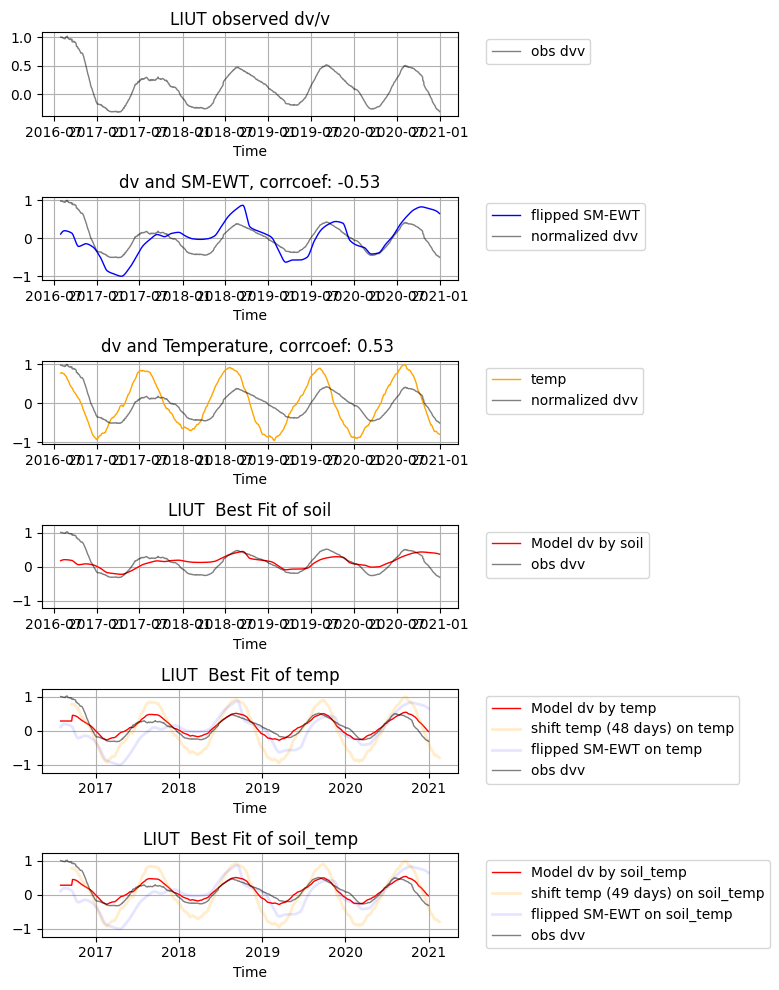

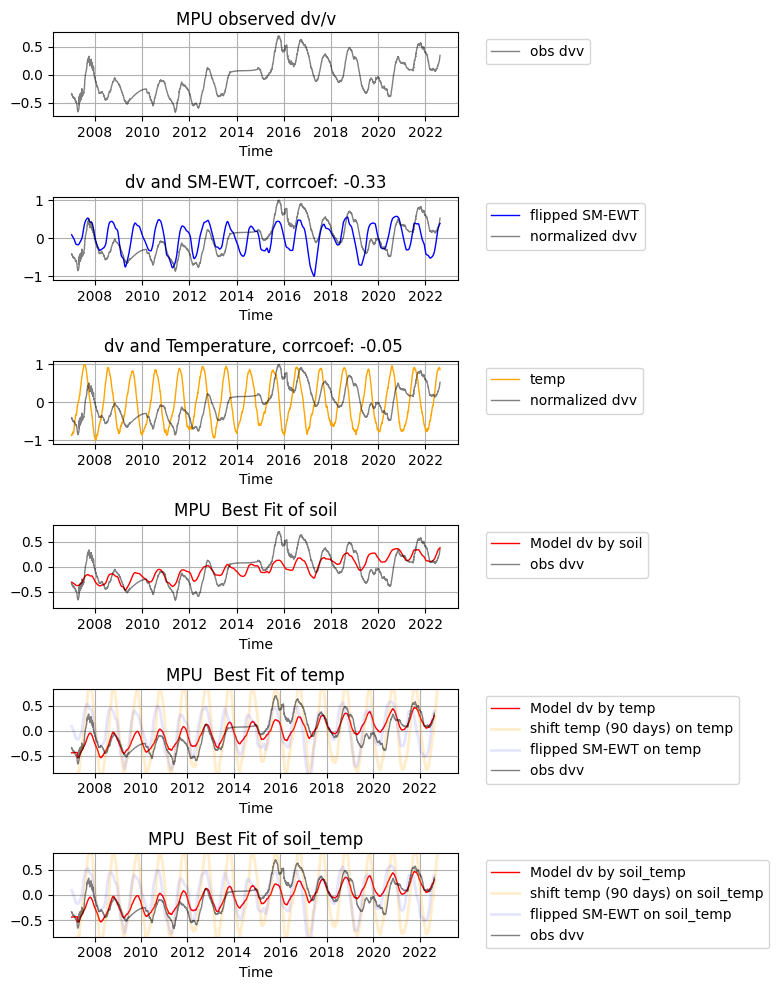

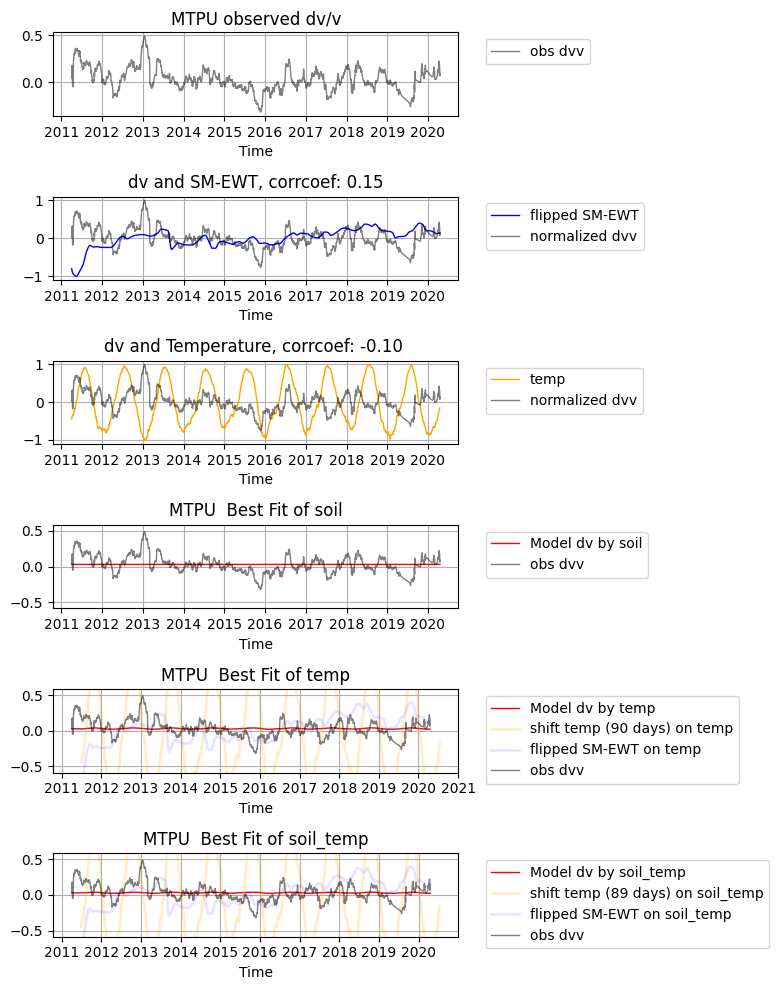

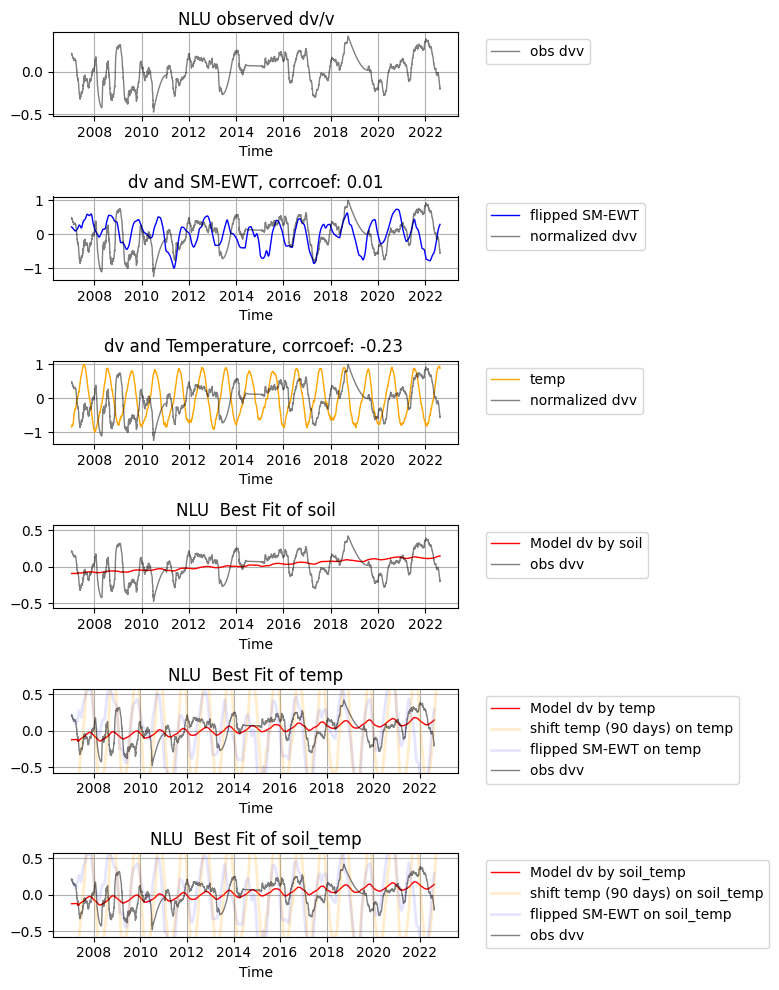

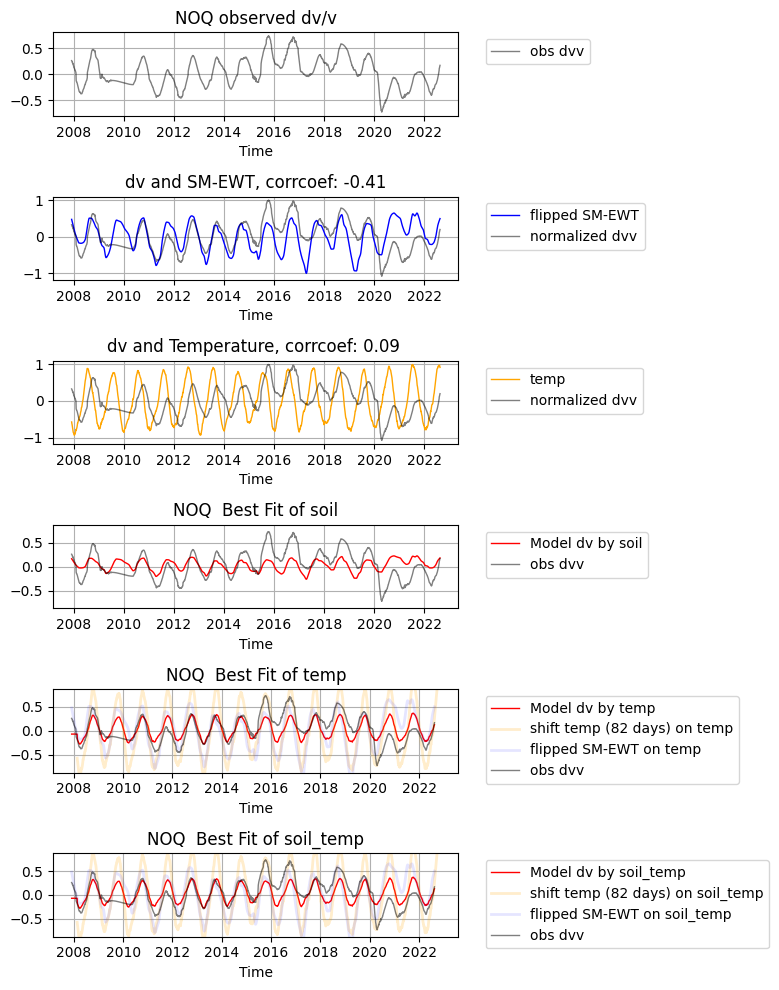

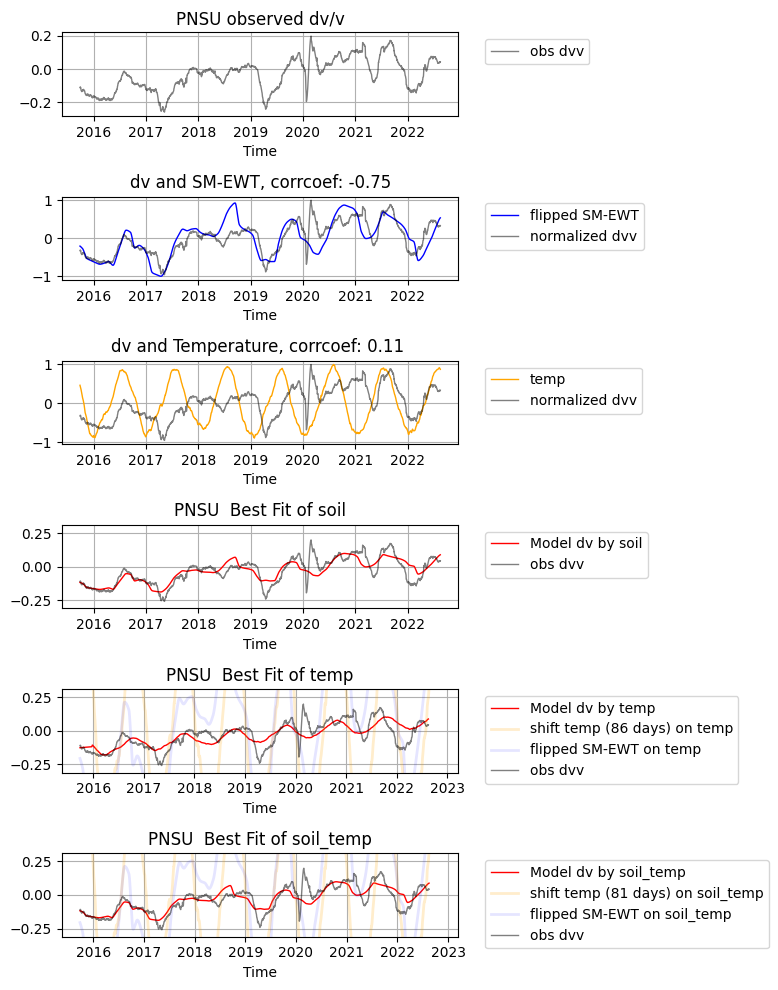

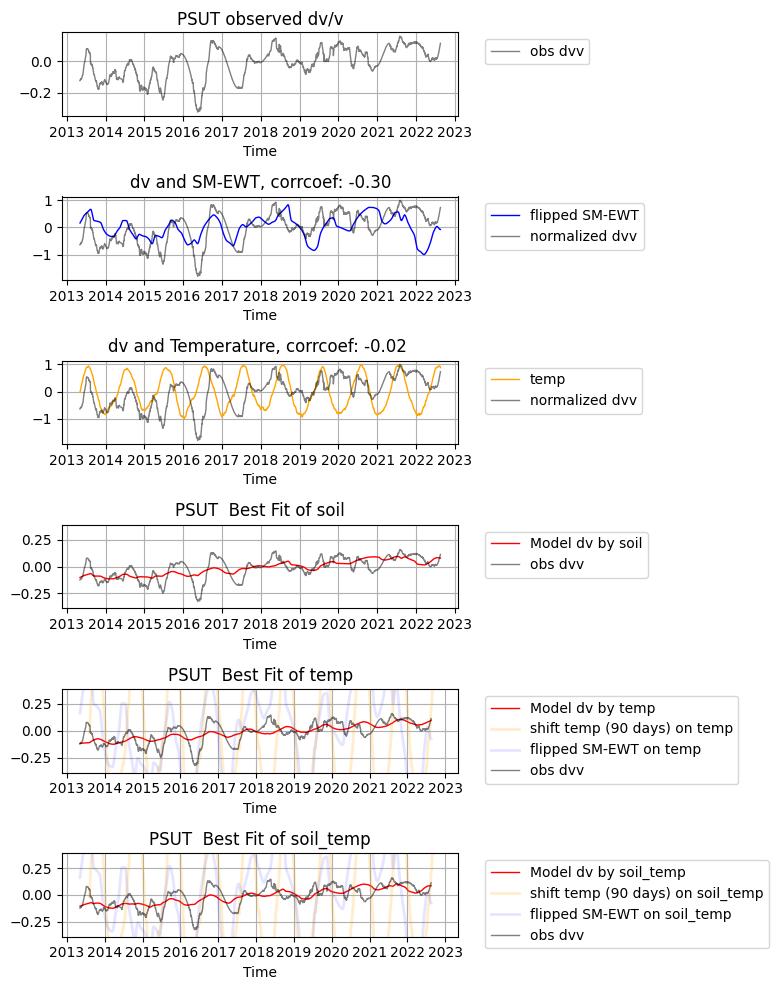

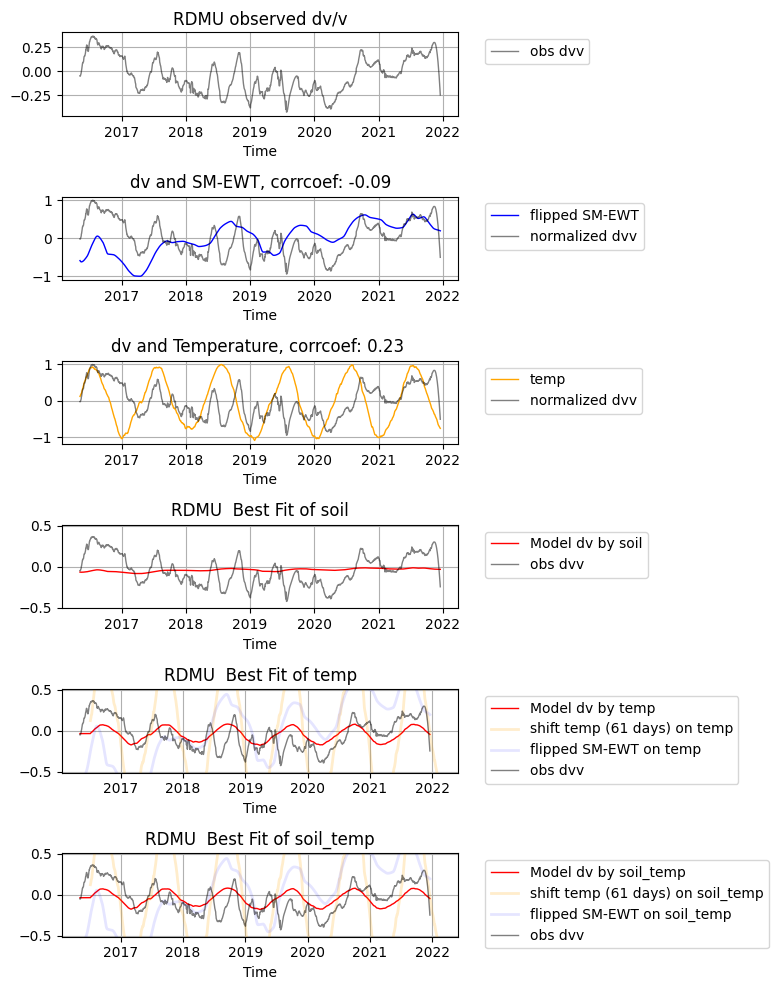

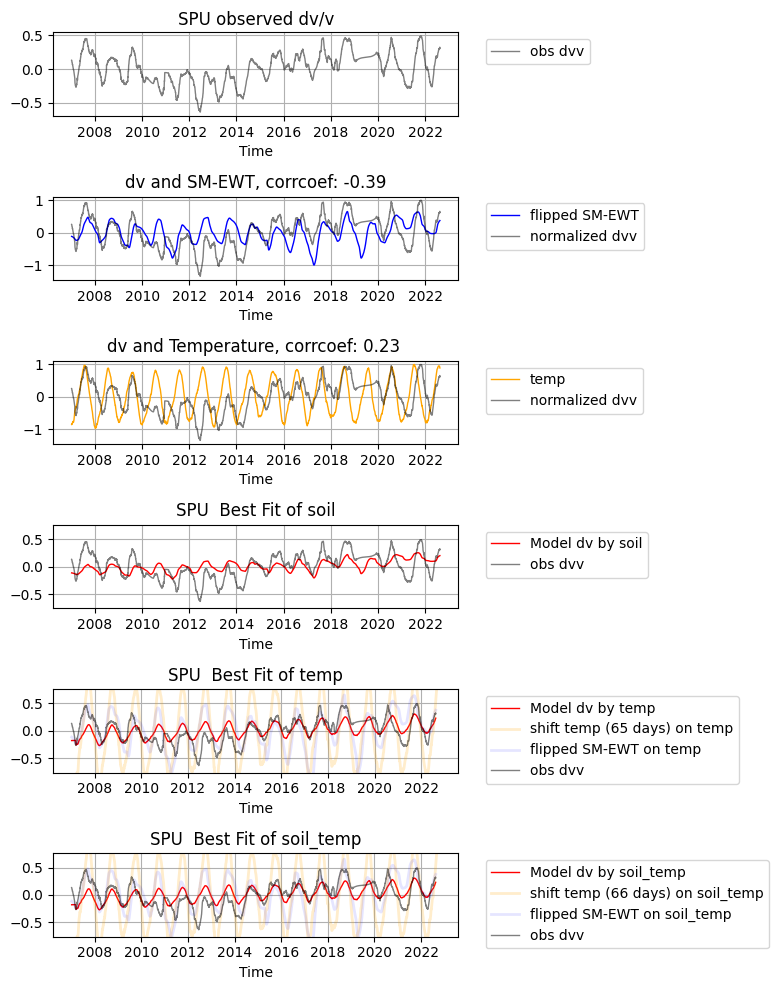

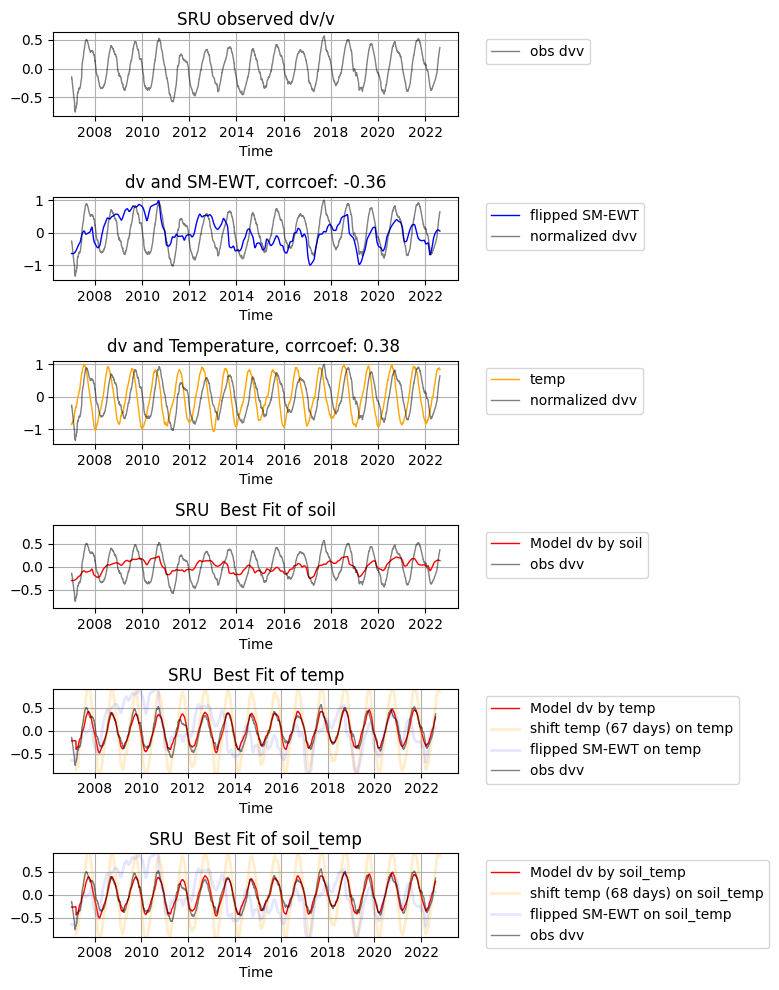

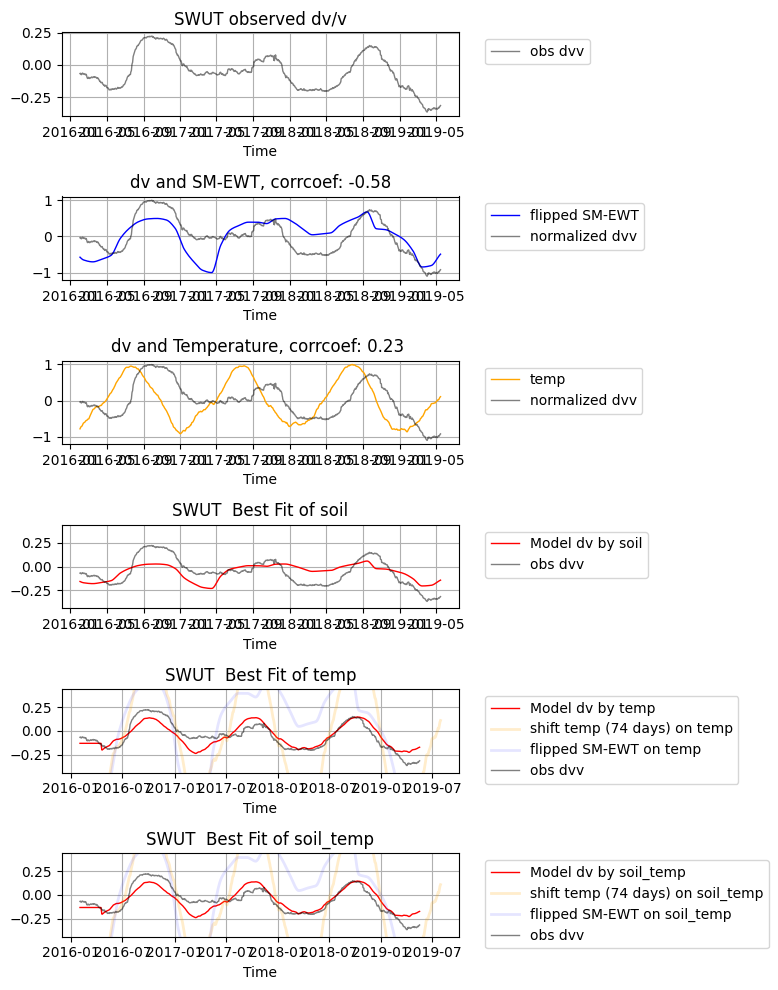

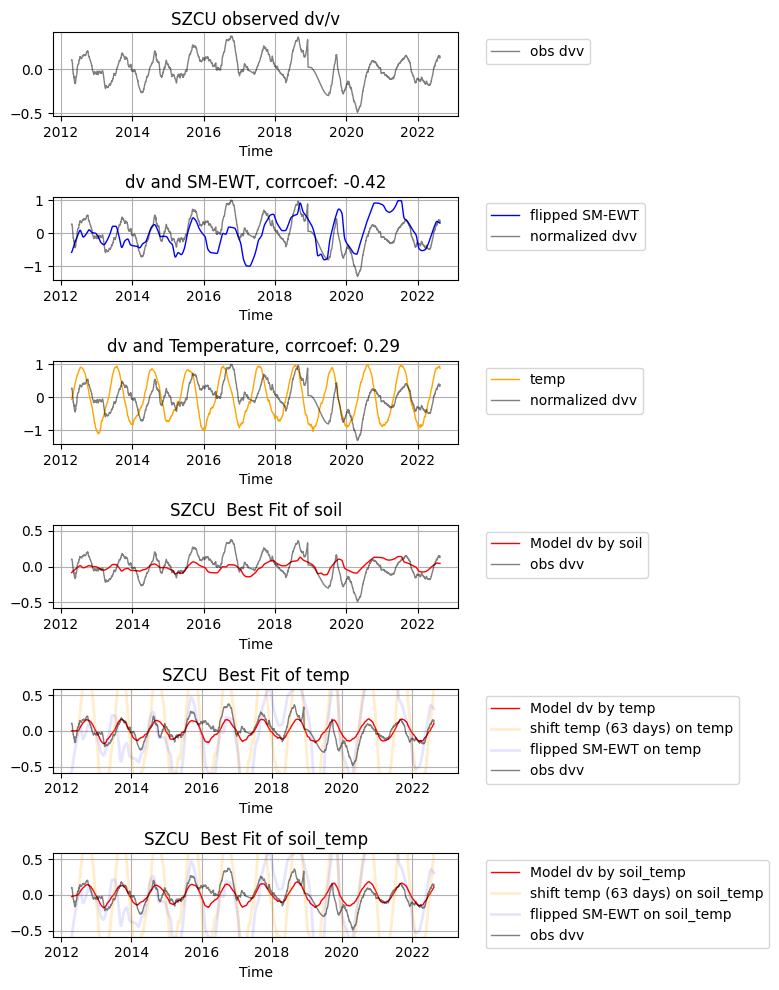

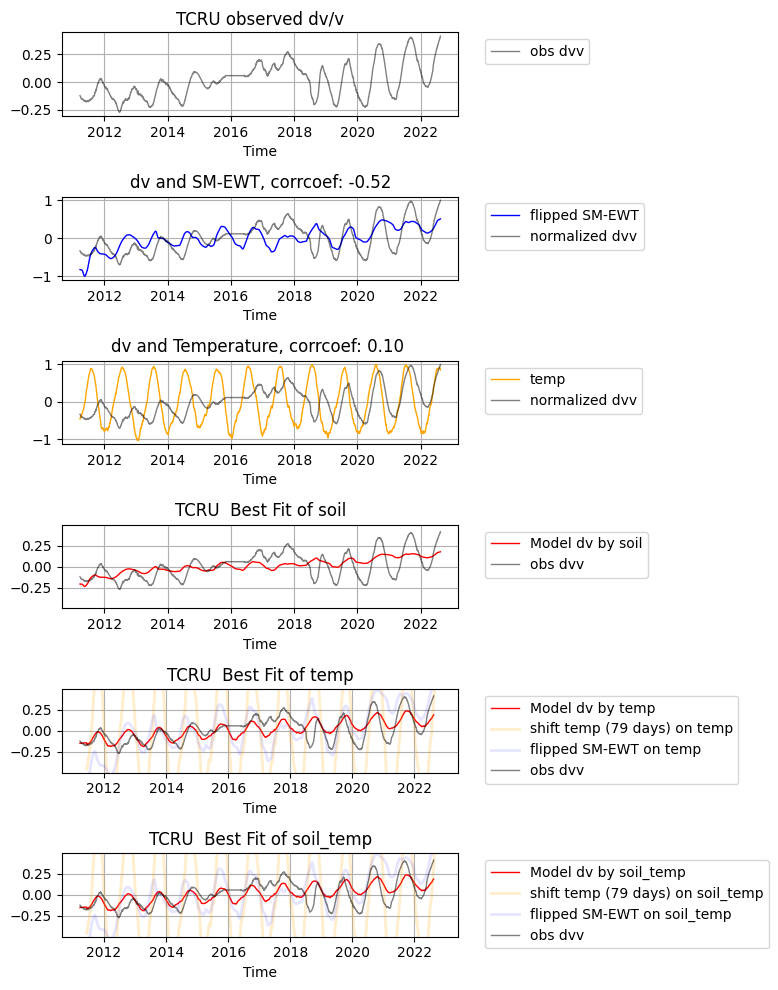

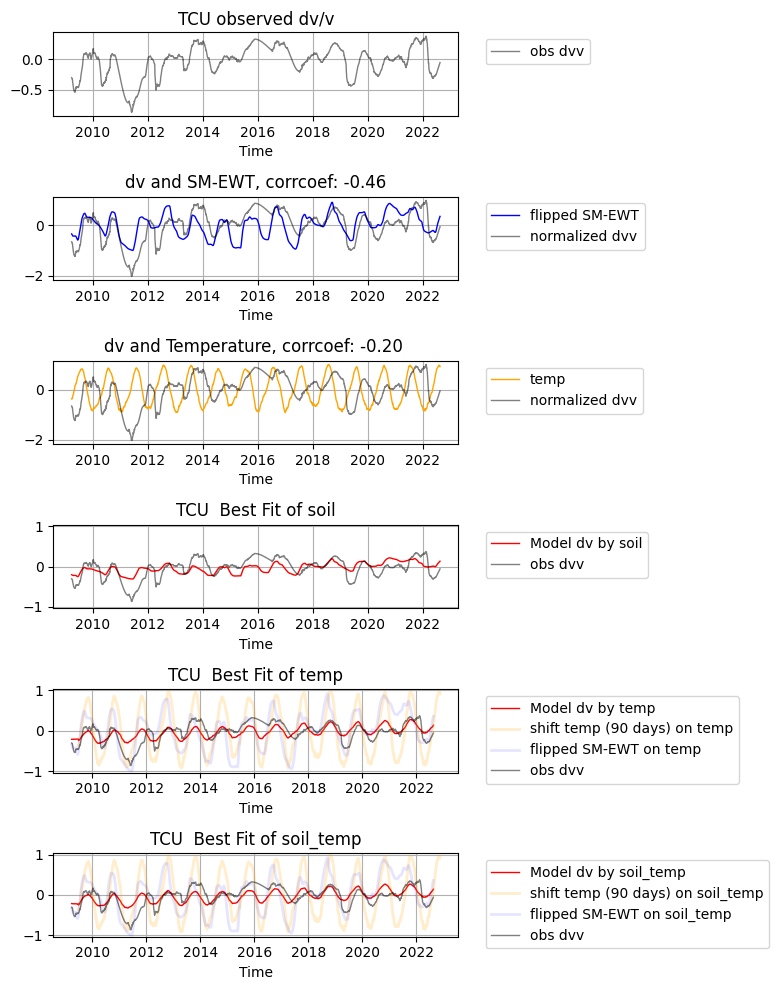

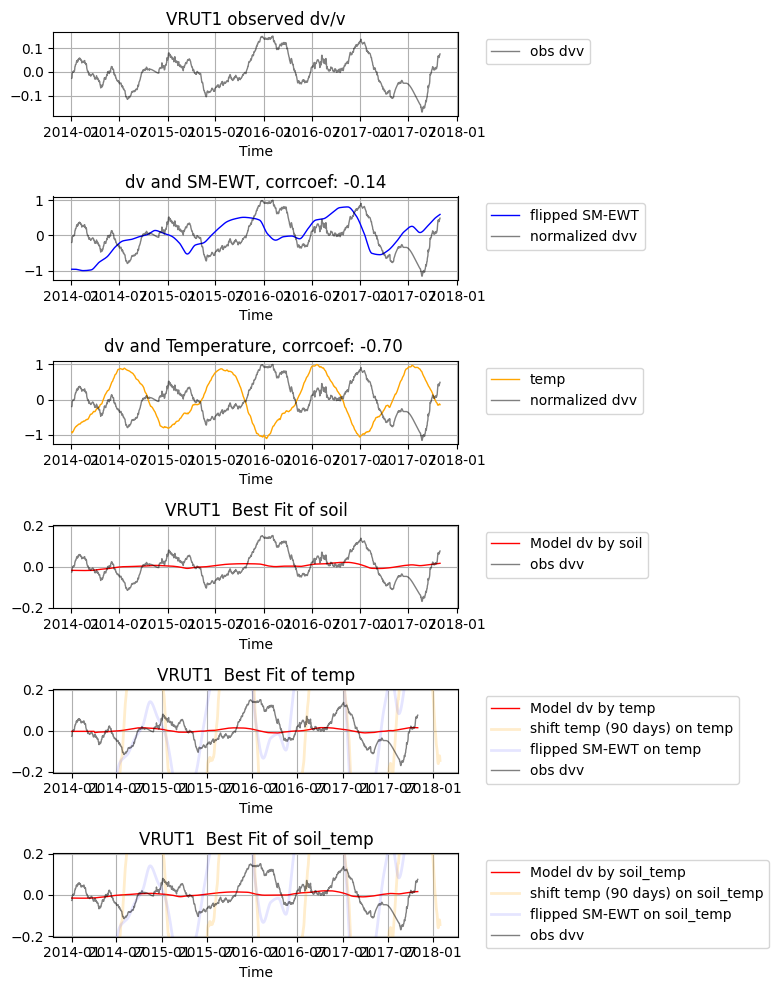

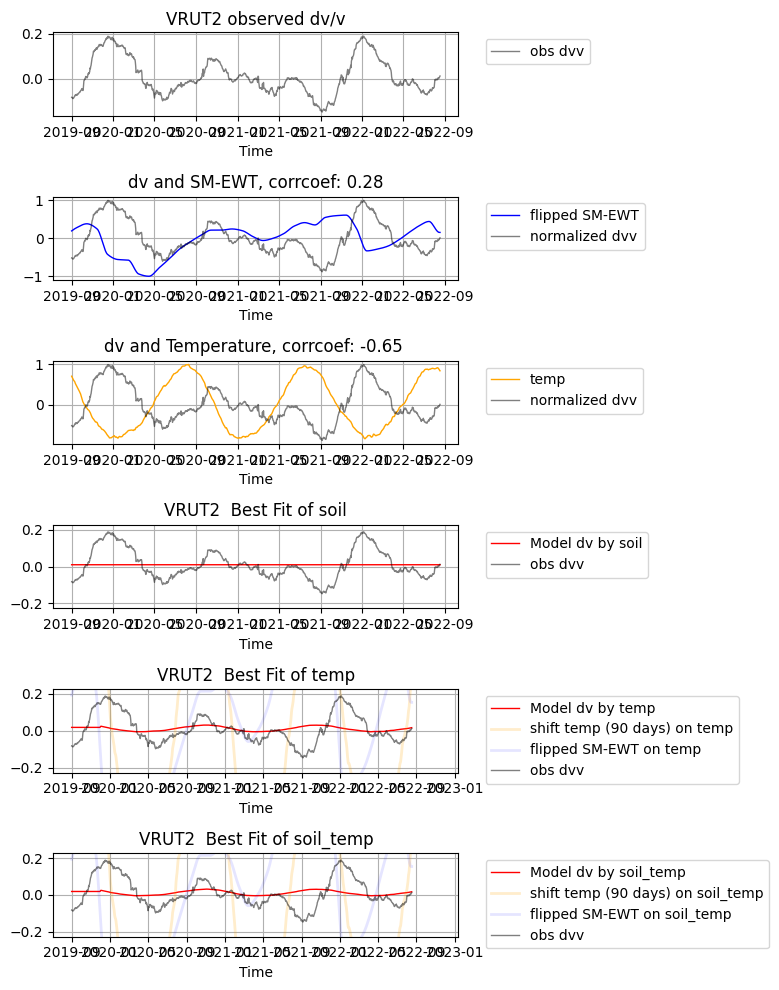

In [6]:
with open(fnst, 'r') as f:
    for stnm in f:
        print(stnm)
        fig, axs = plt.subplots(6, figsize=(8,10))
        figname='Best_'+stnm.strip()+'_fitdv.png'
        
        fn=f'../../PREP_data_demean/INTERP_{stnm.strip()}.csv'
        if (stnm.strip() == 'HVU1') or (stnm.strip() == 'HVU2') or (stnm.strip() == 'VRUT1') or (stnm.strip() == 'VRUT2'):
            dfdata=pd.read_csv(fn,usecols=['utvec','dv','err','temp_degC','SM_EWT_meter','snow_EWT_meter','GSL_meter','UL_meter','date'],sep=',')
            soil=(dfdata.SM_EWT_meter-dfdata.SM_EWT_meter.mean())
            soil=soil/np.max(soil)
            temp=(dfdata.temp_degC-dfdata.temp_degC.mean())
            temp=temp/np.max(temp)
        else:
            dfdata=pd.read_csv(fn,usecols=['utvec','dv','err','temp','SM_EWT','snow_EWT','GSL','UL','date'],sep=',')
            soil=(dfdata.SM_EWT-dfdata.SM_EWT.mean())
            soil=soil/np.max(soil)
            temp=(dfdata.temp-dfdata.temp.mean())
            temp=temp/np.max(temp)
        R2soil=np.corrcoef(dfdata.dv,soil)[0,1]
        R2temp=np.corrcoef(dfdata.dv,temp)[0,1]
        print(R2soil, pd.Series(dfdata.dv).corr(pd.Series(soil))) 
        print(R2temp, pd.Series(dfdata.dv).corr(pd.Series(temp)))
        
        for m, model in enumerate(modelcase):
            cols = ['utvec', 'dv','bestfit','Resi','sdv']
            fcsv="BestFit_csv/Fit_"+stnm.strip()+"_"+model+".csv"
            #print(fcsv)
            fi=pd.read_csv(fcsv,usecols=cols,sep=',')
            
            axs[m+3].plot( pd.to_datetime(fi.utvec),fi.bestfit, '-', color='red', linewidth=1 ,label='Model dv by '+model,)
            #axs[4].plot( pd.to_datetime(fi.utvec),fi.Resi ,'-' , linewidth=1, label='Residuals of '+model)
            if (model == 'temp') :
                fn2=f'ModelCase_{model}_scalar_coef.txt'
                coef=pd.read_csv(fn2,sep=',')
                coef_line = coef[coef['stnm'].str.contains(stnm.strip())]
                print(coef_line)
                tshift='%d'%round(coef_line['tshift'].values[0])
                print(tshift, type(tshift))
                print(pd.DateOffset(days=int(tshift)))
                
                axs[m+3].plot( pd.to_datetime(fi.utvec)+ pd.DateOffset(days=int(tshift)) ,temp ,'-', color='orange' , alpha=0.2, linewidth=2, label=f'shift temp ({tshift} days) on '+model)
                axs[m+3].plot( pd.to_datetime(fi.utvec) ,soil*-1 ,'-', color='blue' , alpha=0.1, linewidth=2, label=f'flipped SM-EWT on '+model)
            elif (model == 'soil_temp'):
                fn2=f'ModelCase_{model}_scalar_coef.txt'
                coef=pd.read_csv(fn2,sep=',')
                coef_line = coef[coef['stnm'].str.contains(stnm.strip())]
                print(coef_line)
                tshift='%d'%round(coef_line['tshift'].values[0])
                print(tshift, type(tshift))
                print(pd.DateOffset(days=int(tshift)))
                
                axs[m+3].plot( pd.to_datetime(fi.utvec)+ pd.DateOffset(days=int(tshift)) ,temp ,'-', color='orange' , alpha=0.2, linewidth=2, label=f'shift temp ({tshift} days) on '+model)
                axs[m+3].plot( pd.to_datetime(fi.utvec) ,soil*-1 ,'-', color='blue' , alpha=0.1, linewidth=2, label=f'flipped SM-EWT on '+model)
            
            else:
                axs[2].plot( pd.to_datetime(fi.utvec),temp ,'-', color='orange' , linewidth=1, label='temp')
                #axs[m+3].plot( pd.to_datetime(fi.utvec)+ pd.DateOffset(days=int(tshift)) ,temp ,'-', color='pink' , linewidth=1, label=f'shift temp ({tshift} days) on '+model)
        
        dvv=(fi.dv-fi.dv.mean())
        normaldv=dvv/np.max(dvv)


        axs[1].plot( pd.to_datetime(fi.utvec),soil *-1 ,'-' , color='blue', linewidth=1, label='flipped SM-EWT')
                   
        axs[0].set_title(stnm.strip()+' observed dv/v')
        axs[1].set_title(f'dv and SM-EWT, corrcoef: {R2soil:.2f}')   
        axs[2].set_title(f'dv and Temperature, corrcoef: {R2temp:.2f} ')
        axs[3].set_title(stnm.strip()+'  Best Fit of '+modelcase[0])
        axs[4].set_title(stnm.strip()+'  Best Fit of '+modelcase[1]) 
        axs[5].set_title(stnm.strip()+'  Best Fit of '+modelcase[2]) 
        axs[0].plot( pd.to_datetime(fi.utvec),fi.dv, '-k' , linewidth=1, alpha=0.5, label='obs dvv')
        for k in range(3,6):
            axs[k].plot( pd.to_datetime(fi.utvec),fi.dv, '-k' , linewidth=1, alpha=0.5, label='obs dvv')
            axs[k].set_ylim(np.max(np.abs(fi.dv))*-1.2 , np.max(np.abs(fi.dv))*1.2)
        for k in range(1,3):
            axs[k].plot( pd.to_datetime(fi.utvec),normaldv, '-k' , linewidth=1, alpha=0.5, label='normalized dvv')
        for k in range(0,6):
            axs[k].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            axs[k].set_xlabel('Time')
            axs[k].grid(True)
                    
        plt.tight_layout()
        #plt.show()
        plt.savefig(figname)


        